# Método de Liebmann (Gauss-Seidel) y Sobrerrelajación Sucesiva (SOR)
El **método de Liebmann** es el nombre que se le da a la aplicación del método de **Gauss-Seidel** para resolver sistemas de ecuaciones lineales que surgen de la discretización de EDPs elípticas, como la Ecuación de Laplace.

La fórmula iterativa para la temperatura en un nodo $(i, j)$ es:
$$ T_{i,j} = \frac{T_{i+1,j} + T_{i-1,j} + T_{i,j+1} + T_{i,j-1}}{4} $$

A diferencia del método de Jacobi, en Gauss-Seidel se utilizan los valores recién calculados en la misma iteración, lo que generalmente acelera la convergencia.

### Sobrerrelajación Sucesiva (SOR)

Es una técnica para acelerar aún más la convergencia. Se calcula un nuevo valor y luego se modifica con un **factor de relajación** $\lambda$:
$$ T_{i,j}^{\text{nuevo}} = \lambda T_{i,j}^{\text{calculado}} + (1-\lambda)T_{i,j}^{\text{anterior}} $$

- Si $\lambda = 1$, el método es Gauss-Seidel.
- Si $1 < \lambda < 2$, se llama **sobrerrelajación** y acelera la convergencia.
- Si $0 < \lambda < 1$, se llama **subrelajación** y se usa para problemas inestables.

La clase `Liebmann` de `mnspy` implementa este método.

In [1]:
from mnspy import Liebmann, mostrar_matrix
import numpy as np

## Ejemplo 1: Placa con Temperaturas Fijas
 
**Problema:** Resolver la distribución de temperatura en una placa cuadrada de 5x5 nodos, con las siguientes condiciones de frontera:
- **Norte:** 80 °C, **Sur:** 20 °C, **Oeste:** 20 °C, **Este:** 0 °C.
- Se usará un factor de relajación $\lambda = 1.9$ para acelerar la convergencia.

In [2]:
# Creamos la instancia de la clase Liebmann.
# Argumentos: (tamaño_malla, condiciones_frontera, valor_inicial, tolerancia, lambda)
li_1 = Liebmann(5, {'norte': 80.0, 'sur': 20.0, 'oeste': 20.0, 'este': 0.0}, 5, tol_porc=0.1, factor_lambda=1.9)

--- Gráfica de Contornos de Temperatura ---


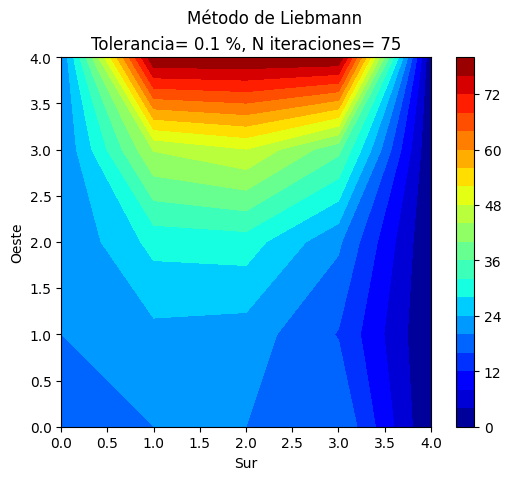

In [3]:
print("--- Gráfica de Contornos de Temperatura ---")
li_1.graficar()

In [4]:
print("\n--- Matriz de Temperatura Final ---")
mostrar_matrix(li_1.U, 2)


--- Matriz de Temperatura Final ---


<IPython.core.display.Math object>

--- Gráfica con Valores en los Nodos ---


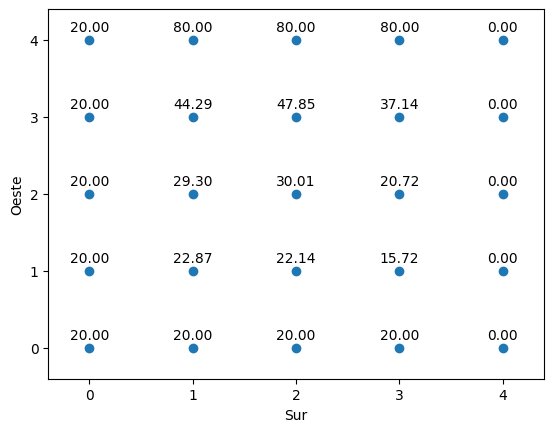

In [5]:
print("--- Gráfica con Valores en los Nodos ---")
li_1.graficar_valores()

## Ejemplo 2: Cálculo del Flujo de Calor
 
**Problema:** Para una placa de 5x5 con diferentes temperaturas de frontera, calcular y visualizar el flujo de calor. El flujo de calor ($q$) es proporcional al gradiente de temperatura ($q = -k \nabla T$). La clase calcula los componentes $q_x$ y $q_y$.


In [6]:
li_2 = Liebmann(5, {'norte': 100.0, 'sur': 0.0, 'oeste': 75.0, 'este': 50.0}, 0, tol_porc=1, factor_lambda=1.5)

--- Gráfica de Contornos de Temperatura ---


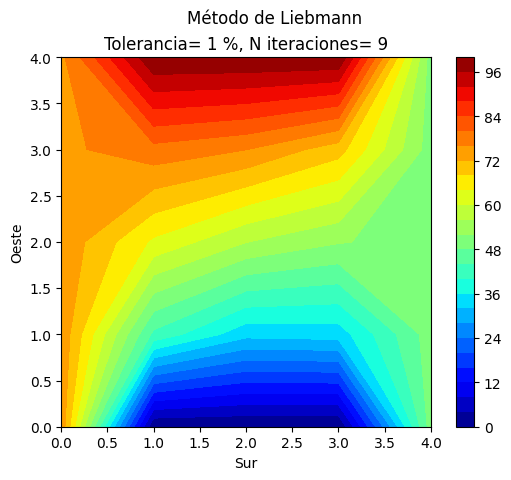

In [7]:
print("--- Gráfica de Contornos de Temperatura ---")
li_2.graficar()


--- Campo Vectorial del Flujo de Calor (q) ---


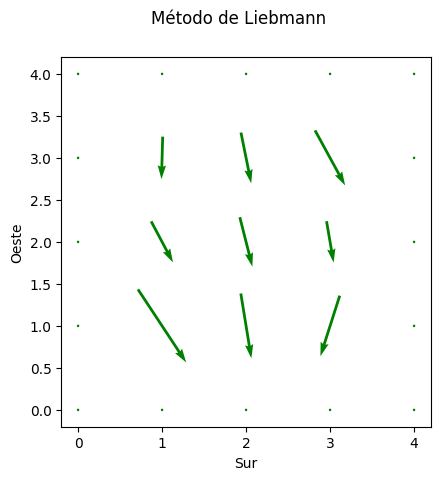

In [8]:
print("\n--- Campo Vectorial del Flujo de Calor (q) ---")
# La gráfica muestra con flechas la dirección y magnitud del flujo de calor, que va de las zonas calientes a las frías.
li_2.graficar_campos()

In [9]:
print("\n--- Matriz con la Magnitud del Flujo de Calor |q| ---")
q_mag = np.sqrt(li_2.q_x ** 2 + li_2.q_y ** 2)
mostrar_matrix(q_mag, 2)


--- Matriz con la Magnitud del Flujo de Calor |q| ---


<IPython.core.display.Math object>

## Ejemplo 3: Placa con Borde Aislado (Condición de Neumann)
 
**Problema:** Resolver el campo de temperaturas para una placa donde el borde sur está aislado (flujo de calor cero), y los otros tienen temperaturas fijas.


In [10]:
# Se especifica el borde aislado con el string 'aislado'.
li_3 = Liebmann((5,5), {'norte': 100.0, 'sur': 'aislado', 'oeste': 75.0, 'este': 50.0}, 0, tol_porc=0.01, factor_lambda=1.5)

--- Gráfica de Contornos de Temperatura (Borde Sur Aislado) ---


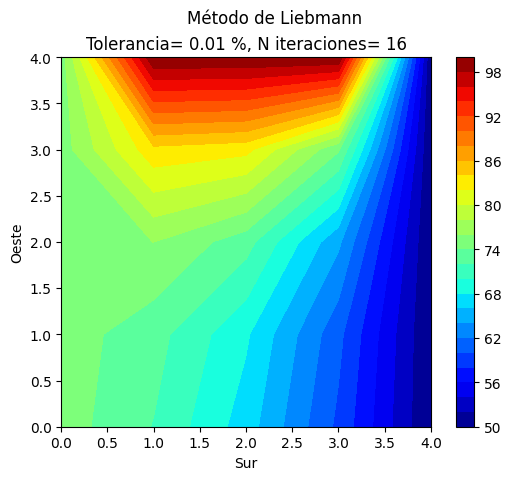

In [11]:
print("--- Gráfica de Contornos de Temperatura (Borde Sur Aislado) ---")
# Nótese cómo las líneas de contorno (isotermas) son perpendiculares al borde sur, indicando que no hay gradiente de temperatura (y por tanto, no hay flujo de calor) a través de esa frontera.
li_3.graficar()

In [12]:
print("\n--- Matriz de Temperatura Final ---")
mostrar_matrix(li_3.U, 2)


--- Matriz de Temperatura Final ---


<IPython.core.display.Math object>

## Ejemplo 4: Método de Liebmann sin Sobrerrelajación
 
**Problema:** Resolver el mismo problema del Ejemplo 2, pero usando el método de Gauss-Seidel estándar (sin aceleración), omitiendo el `factor_lambda` (o usando $\lambda=1$).

In [13]:
# Al no especificar `factor_lambda`, la clase usa por defecto un valor de 1, que corresponde al método de Gauss-Seidel puro.
# El resultado final es el mismo que en el Ejemplo 2, pero el proceso de cálculo requiere más iteraciones para converger.
li_4 = Liebmann(5, {'norte': 100.0, 'sur': 0.0, 'oeste': 75.0, 'este': 50.0}, 0, tol_porc=0.01)

--- Gráfica de Contornos de Temperatura (sin SOR) ---


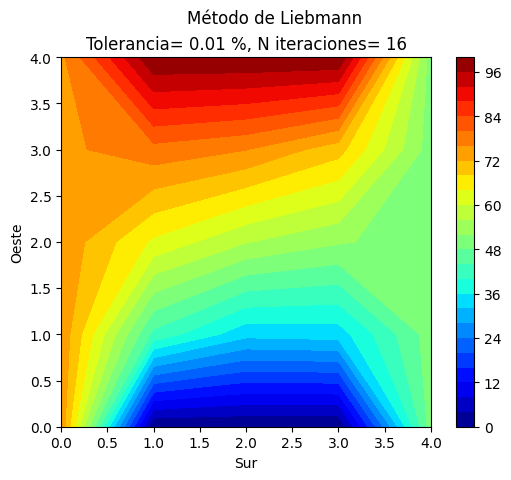

In [14]:
print("--- Gráfica de Contornos de Temperatura (sin SOR) ---")
li_4.graficar()

In [15]:
print("\n--- Matriz de Temperatura Final ---")
mostrar_matrix(li_4.U, 2)


--- Matriz de Temperatura Final ---


<IPython.core.display.Math object>